## Experiment Design Exercise 2
### Reproducing: "Measuring Influence on Instagram: A Network-Oblivious Approach" (Fränzi)

In [117]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)
from matplotlib import pyplot as plt
import sklearn
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

#### load datasets

In [3]:
followers_views = pd.read_csv('followers_views.csv')
followers_views

,followers,views
0,13178,250
1,13178,604
2,13178,239
3,13178,858
4,13178,271
...,...,...
1422889,27493,54348
1422890,27493,23995
1422891,27493,7458
1422892,27493,13465


In [18]:
likes_views = pd.read_csv('likes_views.csv')
likes_views

,likes,views
0,98,250
1,100,604
2,109,239
3,103,858
4,106,271
...,...,...
1426183,4793,54348
1426184,2150,23995
1426185,600,7458
1426186,933,13465


In [59]:
usersData = pd.read_csv('usersData.csv')
usersData

,avg_likes,avg_comments,avg_followers,avg_posts,max_likes,min_likes,avg_views
0,97.5000,3.0000,13178.0,1967.0,113,59,333.1667
1,91.7500,9.2500,4228.0,1402.0,174,39,308.6250
2,33.0000,3.5000,2212.0,2471.0,46,23,126.7500
3,20.0000,3.5000,203.0,1838.0,26,16,65.5000
4,13.2000,1.2000,132.0,309.0,18,9,61.2000
...,...,...,...,...,...,...,...
114776,460.3333,14.6667,1248.0,19.0,1464,61,15346.5000
114777,75.3333,5.3333,1902.0,101.0,135,26,76.5000
114778,64.2000,0.8000,103.0,8.0,119,11,177.8000
114779,58.5882,2.7059,748.0,1801.0,106,12,8.7843


#### check for missing values

In [100]:
followers_views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422894 entries, 0 to 1422893
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   followers  1422894 non-null  int64
 1   views      1422894 non-null  int64
dtypes: int64(2)
memory usage: 21.7 MB


In [101]:
likes_views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426188 entries, 0 to 1426187
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   likes   1426188 non-null  int64
 1   views   1426188 non-null  int64
dtypes: int64(2)
memory usage: 21.8 MB


In [102]:
usersData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114781 entries, 0 to 114780
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   avg_likes              114781 non-null  float64
 1   avg_comments           114781 non-null  float64
 2   avg_followers          114781 non-null  float64
 3   avg_posts              114781 non-null  float64
 4   max_likes              114781 non-null  int64  
 5   min_likes              114781 non-null  int64  
 6   avg_views              114781 non-null  float64
 7   sqrt(followers*likes)  114781 non-null  float64
 8   followers/post         114781 non-null  float64
 9   comments/likes         114781 non-null  float64
 10  difference_likes       114781 non-null  int64  
 11  ratio_min              114781 non-null  float64
 12  ratio_max              114781 non-null  float64
dtypes: float64(10), int64(3)
memory usage: 11.4 MB


#### add features

In [60]:
usersData = pd.read_csv('usersData.csv')
usersData['sqrt(followers*likes)'] = np.sqrt(usersData['avg_followers']*usersData['avg_likes'])
usersData['followers/post'] = usersData['avg_followers']/usersData['avg_posts']
usersData['comments/likes'] = usersData['avg_comments']/usersData['avg_likes']
usersData['difference_likes'] = usersData['max_likes']-usersData['min_likes']
usersData['ratio_min'] = usersData['max_likes']/usersData['min_likes']
usersData['ratio_max'] = usersData['min_likes']/usersData['max_likes']
usersData

,avg_likes,avg_comments,avg_followers,avg_posts,max_likes,min_likes,avg_views,sqrt(followers*likes),followers/post,comments/likes,difference_likes,ratio_min,ratio_max
0,97.5000,3.0000,13178.0,1967.0,113,59,333.1667,1133.514446,6.699542,0.030769,54,1.915254,0.522124
1,91.7500,9.2500,4228.0,1402.0,174,39,308.6250,622.831438,3.015692,0.100817,135,4.461538,0.224138
2,33.0000,3.5000,2212.0,2471.0,46,23,126.7500,270.177719,0.895184,0.106061,23,2.000000,0.500000
3,20.0000,3.5000,203.0,1838.0,26,16,65.5000,63.718129,0.110446,0.175000,10,1.625000,0.615385
4,13.2000,1.2000,132.0,309.0,18,9,61.2000,41.742065,0.427184,0.090909,9,2.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114776,460.3333,14.6667,1248.0,19.0,1464,61,15346.5000,757.955116,65.684211,0.031861,1403,24.000000,0.041667
114777,75.3333,5.3333,1902.0,101.0,135,26,76.5000,378.528647,18.831683,0.070796,109,5.192308,0.192593
114778,64.2000,0.8000,103.0,8.0,119,11,177.8000,81.317895,12.875000,0.012461,108,10.818182,0.092437
114779,58.5882,2.7059,748.0,1801.0,106,12,8.7843,209.341763,0.415325,0.046185,94,8.833333,0.113208


#### how to read the data 

instagrammers have to be grouped first, since there may be multiple with the same amount of followers

In [70]:
followers_views[followers_views['followers']==13178].head(10)

,followers,views
0,13178,250
1,13178,604
2,13178,239
3,13178,858
4,13178,271
5,13178,317
6,13178,318
7,13178,126
136754,13178,1629
136755,13178,1866


In [76]:
usersData[usersData['avg_followers']==13178]

,avg_likes,avg_comments,avg_followers,avg_posts,max_likes,min_likes,avg_views,sqrt(followers*likes),followers/post,comments/likes,difference_likes,ratio_min,ratio_max
0,97.5,3.0000,13178.0,1967.0,113,59,333.1667,1133.514446,6.699542,0.030769,54,1.915254,0.522124
12134,304.5,17.2857,13178.0,2929.0,396,236,1540.7143,2003.172733,4.499146,0.056767,160,1.677966,0.595960


the first 8 rows of followers_views belong to the same person

In [81]:
instagrammer_0_followers = followers_views[followers_views['followers']==13178].head(8)
instagrammer_0_followers

,followers,views
0,13178,250
1,13178,604
2,13178,239
3,13178,858
4,13178,271
5,13178,317
6,13178,318
7,13178,126


In [72]:
instagrammer_0_likes.describe()

,likes,views
count,8.000000,8.000000
mean,93.125000,372.875000
std,22.203201,238.819979
min,57.000000,126.000000
25%,88.250000,247.250000
50%,101.500000,294.000000
75%,106.750000,389.500000
max,113.000000,858.000000


likewise use the first 8 rows of likes_views

In [82]:
instagrammer_0_likes = likes_views.head(8)
instagrammer_0_likes

,likes,views
0,98,250
1,100,604
2,109,239
3,103,858
4,106,271
5,59,317
6,113,318
7,57,126


In [74]:
instagrammer_0_followers.describe()

,followers,views
count,8.0,8.000000
mean,13178.0,372.875000
std,0.0,238.819979
min,13178.0,126.000000
25%,13178.0,247.250000
50%,13178.0,294.000000
75%,13178.0,389.500000
max,13178.0,858.000000


In [77]:
usersData.loc[[0]]

,avg_likes,avg_comments,avg_followers,avg_posts,max_likes,min_likes,avg_views,sqrt(followers*likes),followers/post,comments/likes,difference_likes,ratio_min,ratio_max
0,97.5,3.0,13178.0,1967.0,113,59,333.1667,1133.514446,6.699542,0.030769,54,1.915254,0.522124


#### definition influence
##### example first instagrammer:

In [75]:
#not sure whether this
#C_u := content posted by u part of U
C_u = usersData['avg_posts'].loc[0]
C_u

1967.0

In [91]:
#or this
#C_u := content posted by u part of U
index = instagrammer_0_likes.index
C_u = len(index)
C_u

8

In [92]:
#sum_V_c := number of instagrammers that saw post c part of C
sum_V_c = instagrammer_0_likes['views'].sum()
sum_V_c

2983

In [93]:
#influence := expected exposure their content would receive expected number of views per post
influence=(sum_V_c)/(C_u)
influence

372.875

#### reproducing the graphs from the paper

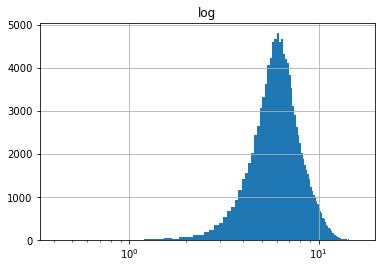

In [114]:
df =usersData['avg_views'].transform([np.log])
df.hist(bins=100)
plt.xscale("log")
plt.savefig('./log.jpg')

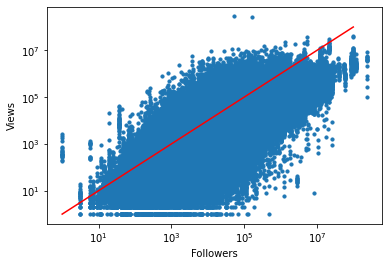

In [116]:
plt.scatter(followers_views['followers'], followers_views['views'], s=10)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Followers")
plt.ylabel("Views")
plt.plot([1,10**8],[1,10**8],color='red')

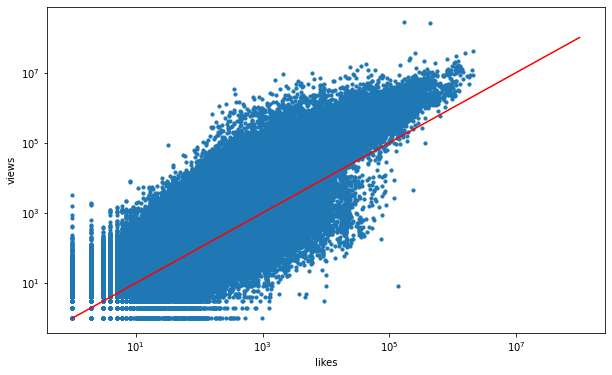

In [20]:
plt.scatter(likes_views['likes'], likes_views['views'], s=10)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("likes")
plt.ylabel("views")
plt.plot([1,10**8],[1,10**8],color='red')

#### model

In [ ]:
#testsplit 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)